# Packages

In [58]:
%matplotlib notebook

import sys
import os
from pathlib import Path
import numpy as np
from matplotlib import pyplot as plt
import fabio
import pyFAI

import h5py

# Paths

In [59]:
path_proj = Path('..', '..', '..', 'DATA_FAST', 'SAXS', 'MARS_CEA_2204')

path_raw = Path(path_proj, "raw")
path_ut = Path(path_proj, "utilities")
path_int = Path(path_proj, "integrated")
path_res = Path(path_proj, "results")

# Functions

In [60]:

def get_E(wvl):
    # Energy should be in Ang !!!
    # Return the wavelenght in m
    # -----------------------------------
    # Plank Constant
    h = 6.62607004e-34 # m2 . kg / s
    # light celerity
    c = 299792458 # m / s
    # Joule -> eV
    eV = 6.242e+18 # eV / J
    
    # Conversion Energy -> wavelenght 
    E = ((h*c)/(wvl*1e-10)) * eV # eV
    
    return E

# Open an image


In [61]:
calib_path = Path(path_raw, 'scan_0016_0001.nxs')

f = h5py.File(calib_path, "r")

print(list(f['_']))


print(list(f['_']['MARS']))

print('===========')
print(list(f['_']['scan_data']))


print('-----')
print(list(f['_']['scan_data']['data_01']))
print('-----')
print(list(f['_']['scan_data']['data_02']))

print('-----')
print(list(f['_']['scan_data']['sensors_rel_timestamps']))

['MARS', 'User', 'duration', 'end_time', 'experiment_identifier', 'run_cycle', 'scan_config', 'scan_data', 'start_time', 'title']
['ans__ca__machinestatus_#2', 'd03-1-c01__ex__fent_h1_#2', 'd03-1-c01__ex__fent_v1_#2', 'd03-1-c02__op__mir1-mt_c_#2', 'd03-1-c02__op__mir1-mt_rx_#2', 'd03-1-c03__op__mono1_old_#2', 'd03-1-c04__ex__fent_al_#2', 'd03-1-c04__op__mir2-mt_c_#2', 'd03-1-c04__op__mir2-mt_rs_#2', 'd03-1-c04__op__mir2-mt_rx_#2', 'd03-1-c04__op__mir2-mt_tz_#2', 'd03-1-c05__ex__fent_h2_#2', 'd03-1-c05__ex__fent_v2_#2', 'd03-1-cx0__ex__spare1-mt_#2', 'd03-1-cx0__ex__spare2-mt_#2', 'd03-1-cx0__ex__spt_mf-mt_rx_#2', 'd03-1-cx0__ex__spt_mf-mt_rz_#2', 'd03-1-cx0__ex__spt_mf-mt_ts_#2', 'd03-1-cx0__ex__spt_mf-mt_tx_#2', 'd03-1-cx0__ex__spt_mf-mt_tz.1_#2', 'd03-1-cx0__ex__spt_mf-mt_tz.2_#2', 'd03-1-cx2__ex__dif-mt_rx.1_#2', 'd03-1-cx2__ex__dif-mt_rx.2_#2', 'd03-1-cx2__ex__gonio-mt_rs_#2', 'd03-1-cx2__ex__gonio-mt_rz_#2', 'd03-1-cx2__ex__gonio-mt_ts_#2', 'd03-1-cx2__ex__gonio-mt_tx_#2', 'd03-1

<IPython.core.display.Javascript object>


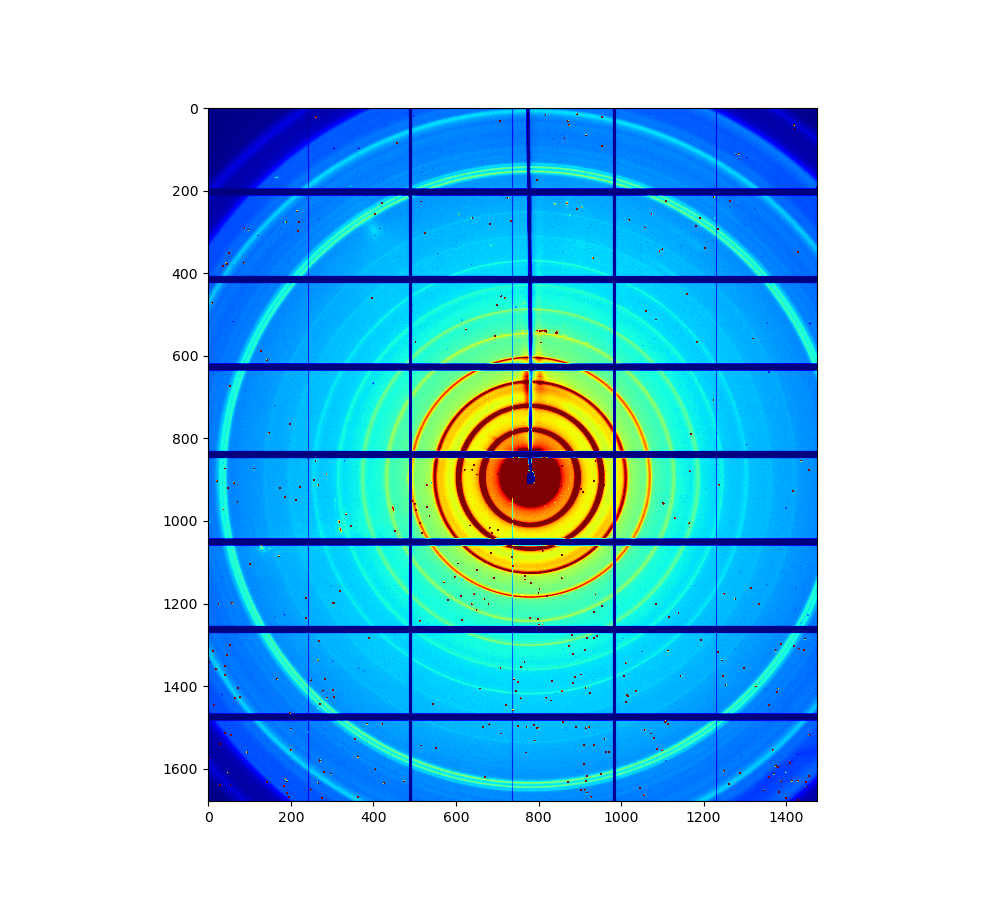

In [62]:
calib_path = Path(path_raw, 'scan_0016_0001.nxs')

f = h5py.File(calib_path, "r")
IMGs = f['_']['scan_data']['data_01']

IMG = np.zeros((IMGs.shape[1], IMGs.shape[2]))
IMG = IMGs[0,:,:]

fig = plt.figure(figsize=(10, 9))
plt.imshow(IMG, cmap='jet')
plt.clim(0, 2550)
plt.show()

In [63]:
E = 17 # keV
detector = 'pilatus2m' 
calib_type = 'AgBh'
path_img_calib = calib_path
#path_img_mask = Path(path_ut, 'mask_calib.edf')


cmd = f"pyFAI-calib2 -e {E} --calibrant {calib_type}"
#cmd = f"pyFAI-calib2 -e {E} --calibrant {calib_type} {path_img_calib}"

os.system(cmd)

INFO:numexpr.utils:NumExpr defaulting to 8 threads.
  File "/home/spartac/anaconda3/envs/xrd-integ/lib/python3.9/site-packages/silx/gui/plot/matplotlib/__init__.py", line 32, in <module>
    deprecated_warning(type_='module',
QStandardPaths: XDG_RUNTIME_DIR not set, defaulting to '/tmp/runtime-spartac'
INFO:pyFAI.method_registry:Degrading method from Method(dim=1, split='pseudo', algo='histogram', impl='*', target=None) -> Method(dim=1, split='bbox', algo='histogram', impl='*', target=None)
INFO:pyFAI.method_registry:Degrading method from Method(dim=2, split='full', algo='histogram', impl='*', target=None) -> Method(dim=2, split='pseudo', algo='histogram', impl='*', target=None)
  File "/home/spartac/anaconda3/envs/xrd-integ/lib/python3.9/site-packages/silx/utils/html.py", line 32, in <module>
    deprecated_warning(type_='module',


0

In [55]:
IMGs.shape[1]* IMGs.shape[2]

2476525